In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
# --- Step 1: Data Loading ---
# Make sure the 'Employee_Performance.xls' file
# is in the same directory as your script.
try:
    df = pd.read_csv('./Employee_Performance_DataSet.csv')
    print("Dataset loaded successfully.")
except FileNotFoundError:
    print("Error: The CSV file was not found. Please ensure it is in the correct directory.")
    exit()

Dataset loaded successfully.


In [3]:
# --- Step 2: Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Display basic information about the dataset
print("\nDataFrame Info:")
df.info()


--- Exploratory Data Analysis (EDA) ---

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement 

In [4]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
               Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%              

In [5]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64


In [6]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

In [7]:
# Drop 'EmpNumber' as it's an identifier and not useful for analysis
if 'EmpNumber' in numerical_cols:
    numerical_cols.remove('EmpNumber')
if 'EmpNumber' in categorical_cols:
    categorical_cols.remove('EmpNumber')

In [8]:
# --- Step 3: Visualizations for EDA ---
print("\n--- Generating Visualizations for EDA ---")
sns.set_style("whitegrid")
plt.style.use('fivethirtyeight')


--- Generating Visualizations for EDA ---


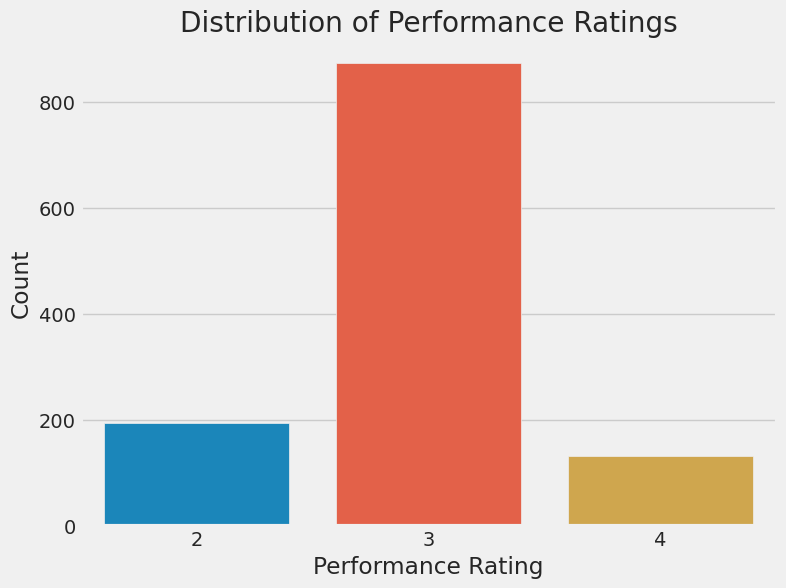

<Figure size 640x480 with 0 Axes>

In [9]:
# Distribution of the target variable: PerformanceRating
plt.figure(figsize=(8, 6))
sns.countplot(x='PerformanceRating', data=df)
plt.title('Distribution of Performance Ratings')
plt.xlabel('Performance Rating')
plt.ylabel('Count')
plt.show()
plt.savefig('images/dist_of_performance_ratings.png')

Generating count plots for categorical features...


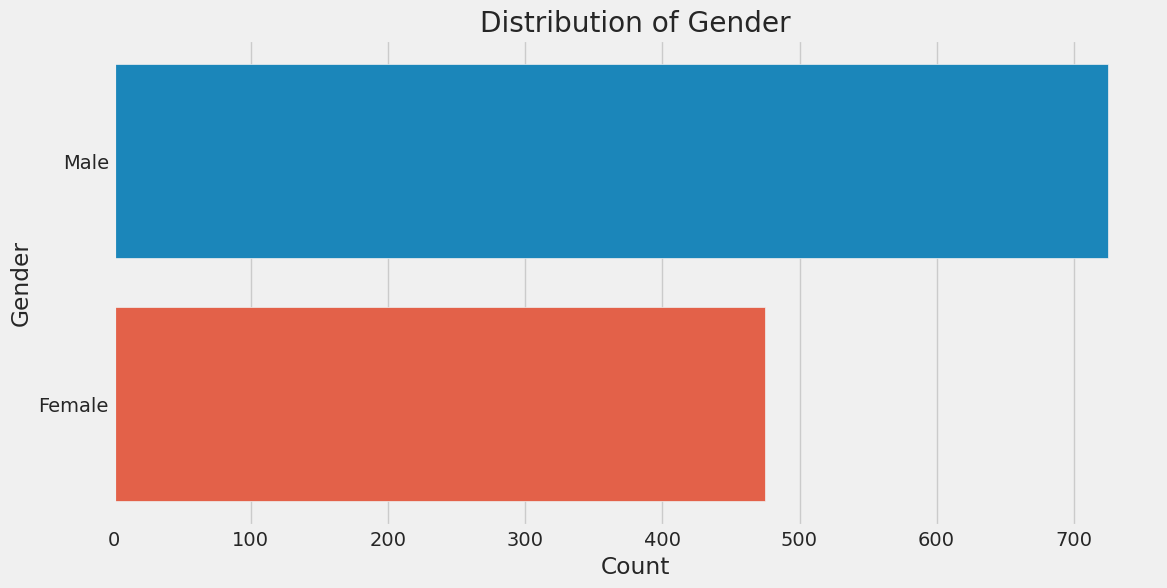

<Figure size 640x480 with 0 Axes>

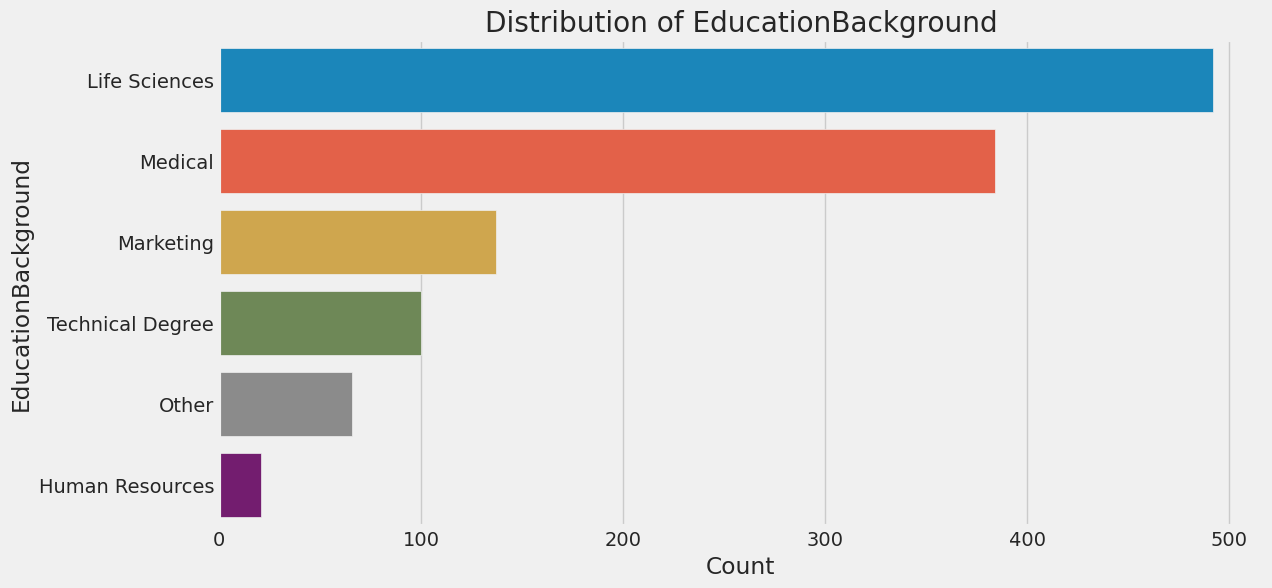

<Figure size 640x480 with 0 Axes>

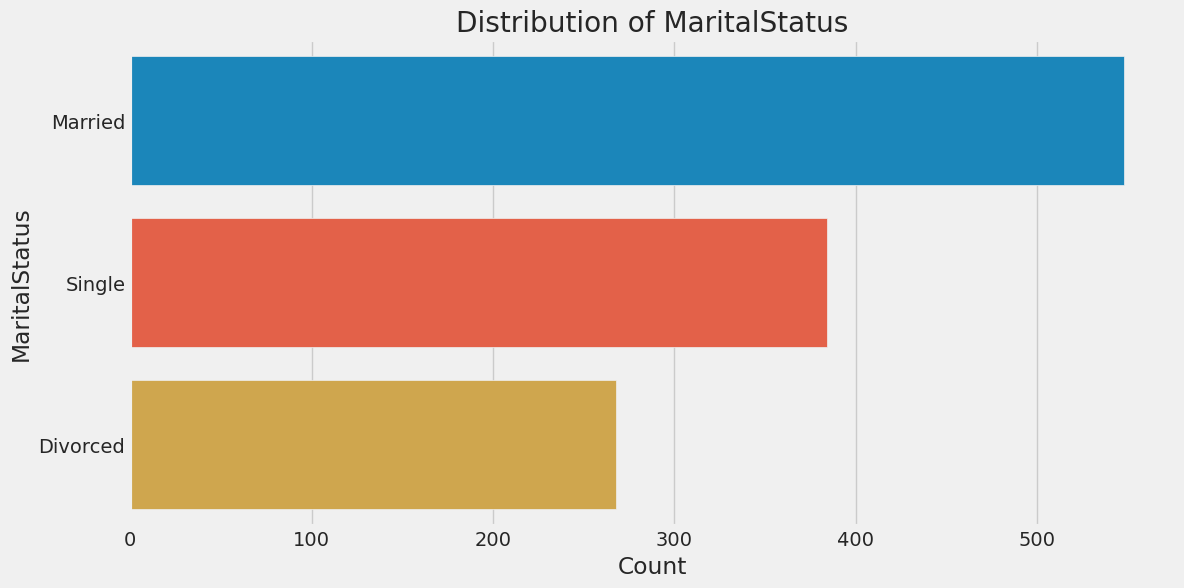

<Figure size 640x480 with 0 Axes>

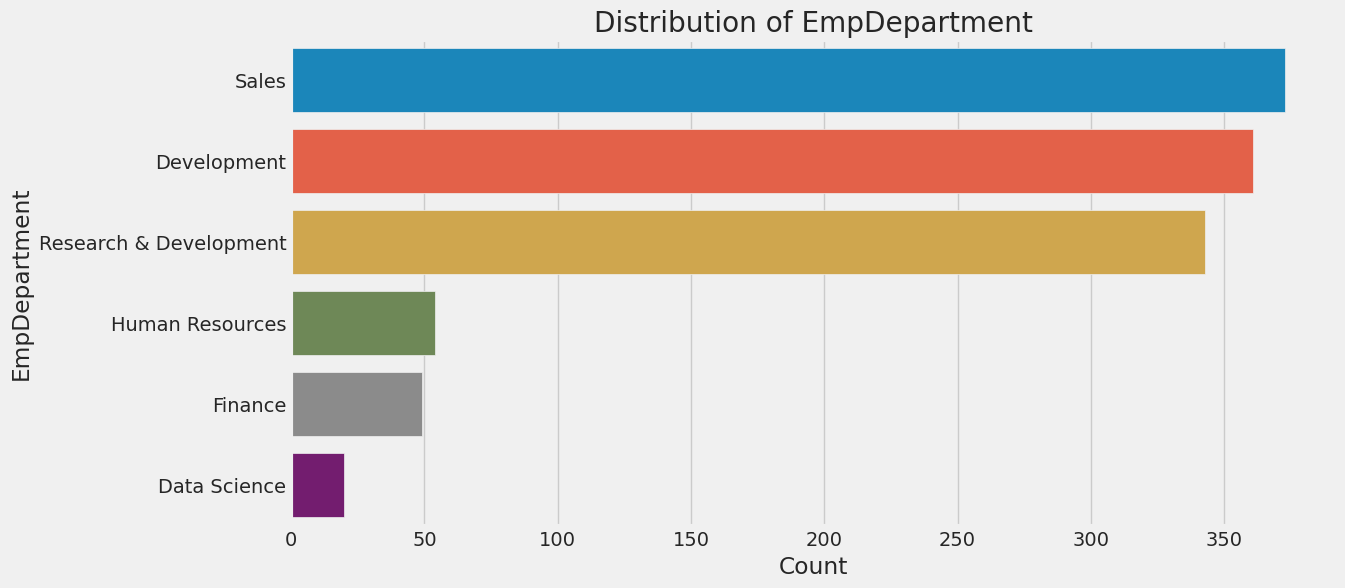

<Figure size 640x480 with 0 Axes>

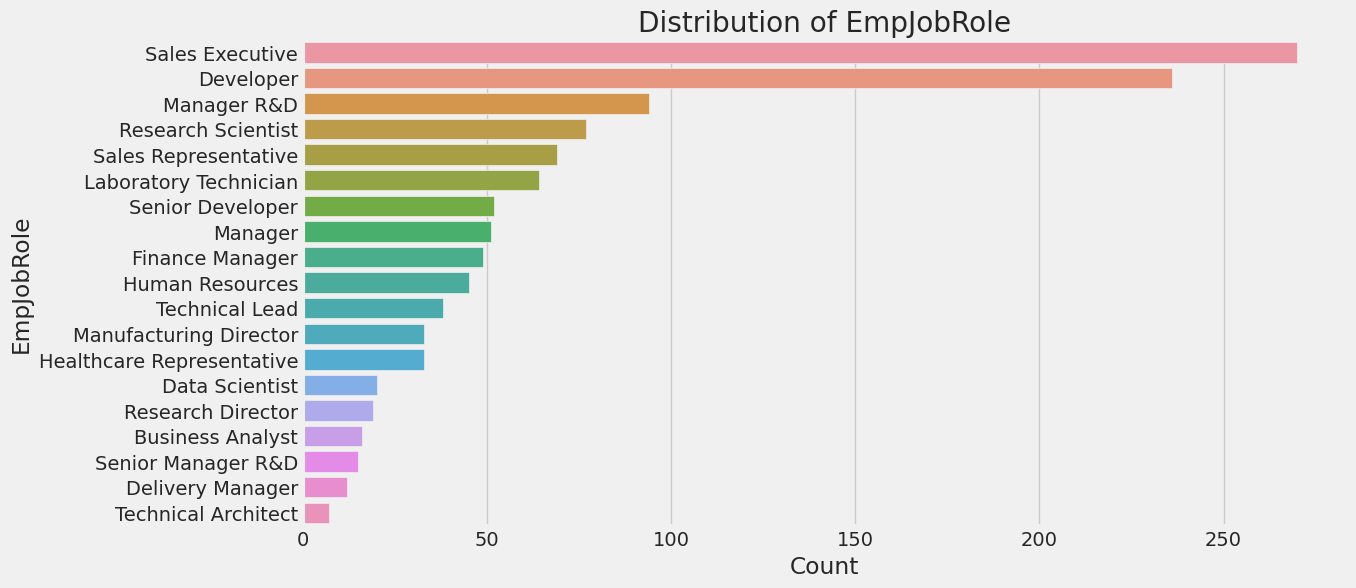

<Figure size 640x480 with 0 Axes>

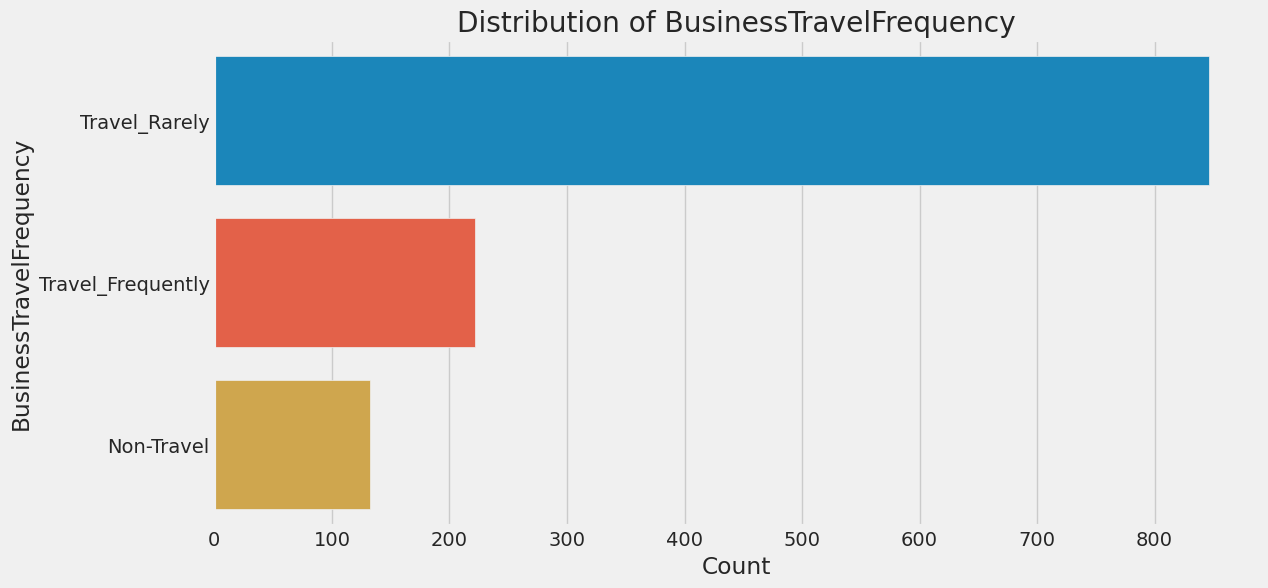

<Figure size 640x480 with 0 Axes>

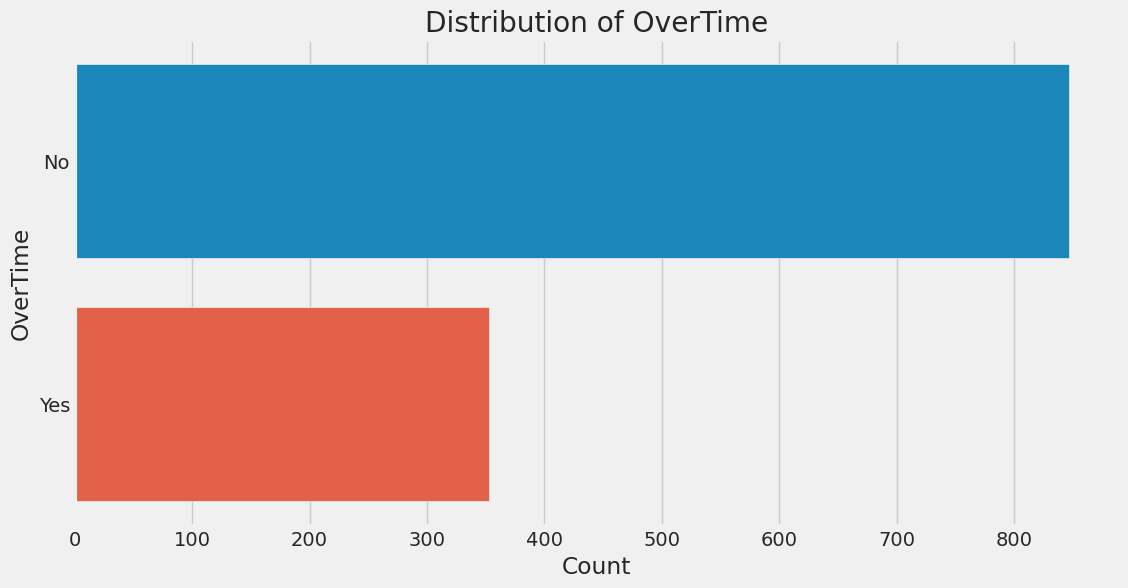

<Figure size 640x480 with 0 Axes>

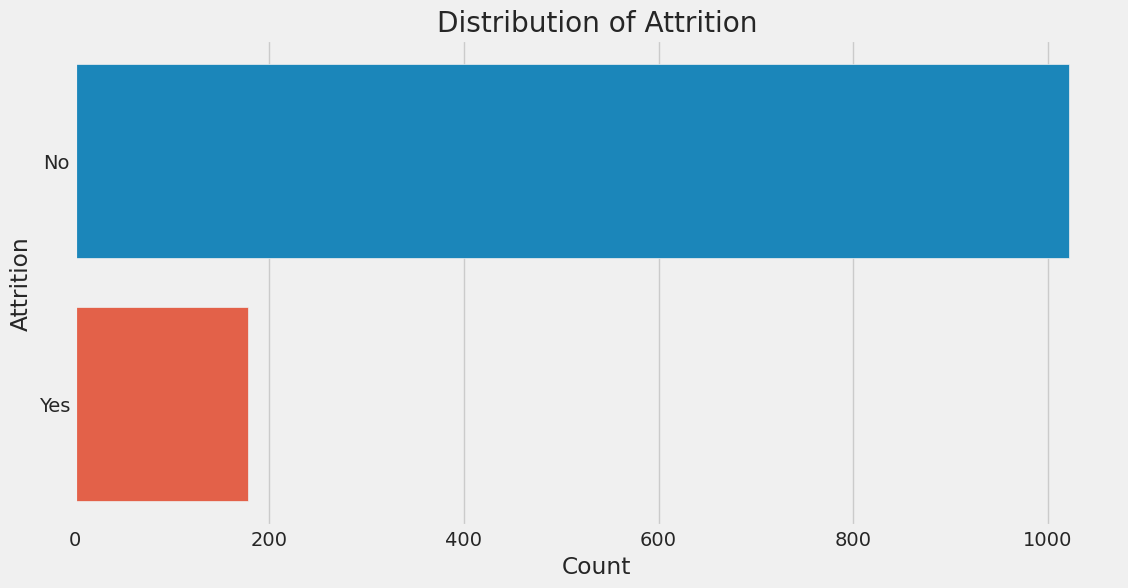

<Figure size 640x480 with 0 Axes>

In [10]:
# Distribution of categorical features
print("Generating count plots for categorical features...")
for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
    plt.savefig('images/distribution_of_gender.png')

Generating histograms for numerical features...


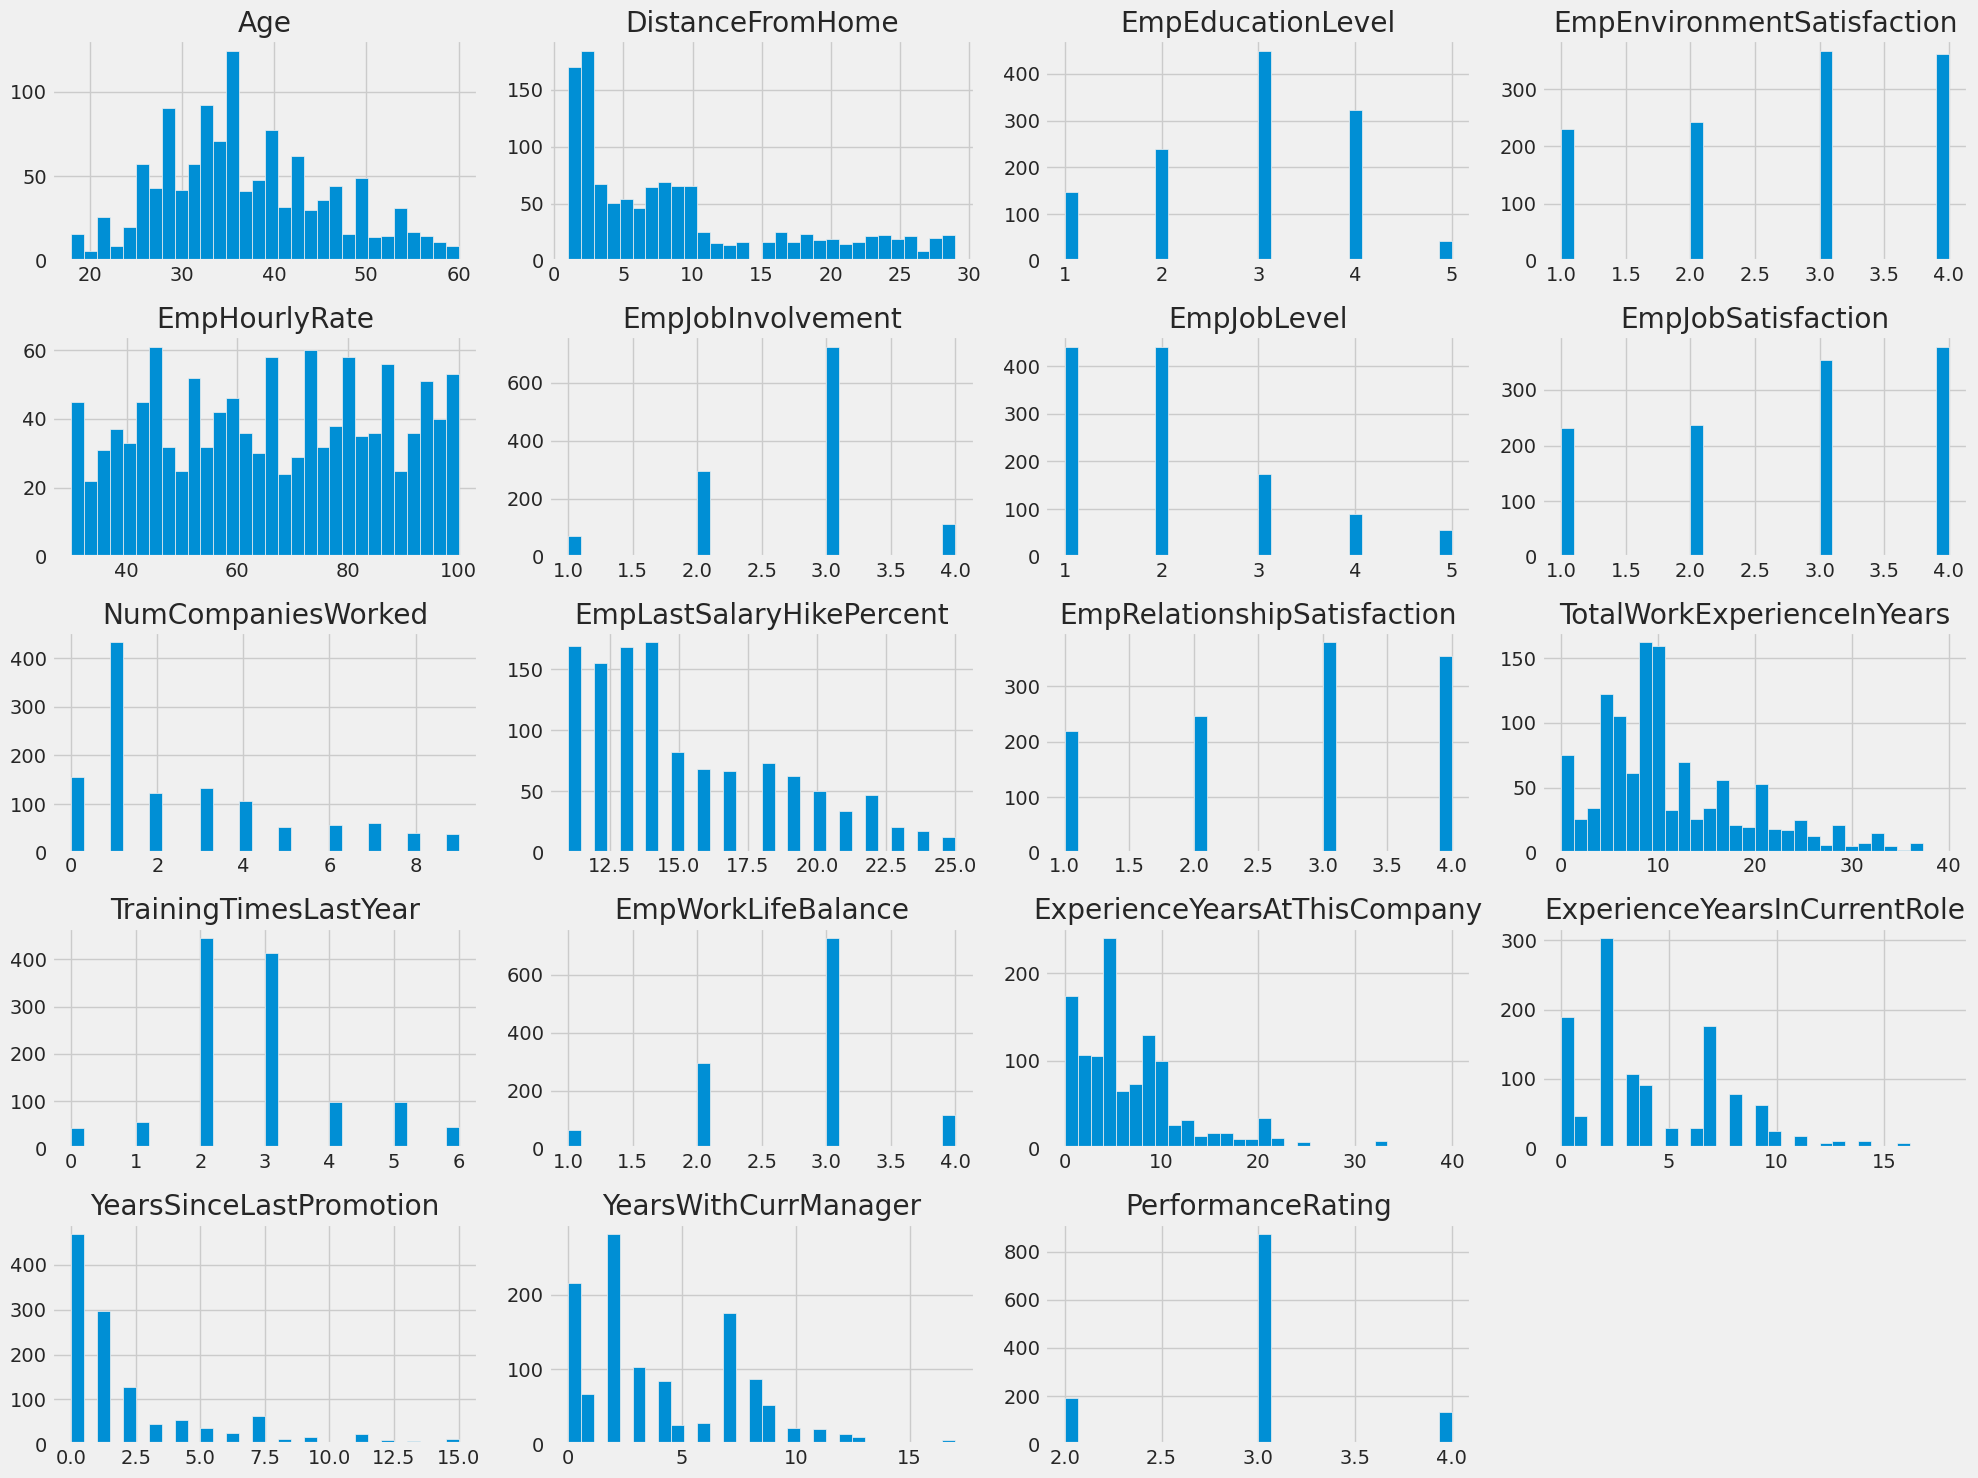

<Figure size 640x480 with 0 Axes>

In [11]:
# Distribution of numerical features
print("Generating histograms for numerical features...")
df[numerical_cols].hist(figsize=(20, 15), bins=30)
plt.tight_layout()
plt.show()
plt.savefig('images/numerical_features_histogram.png')

Generating a correlation heatmap...


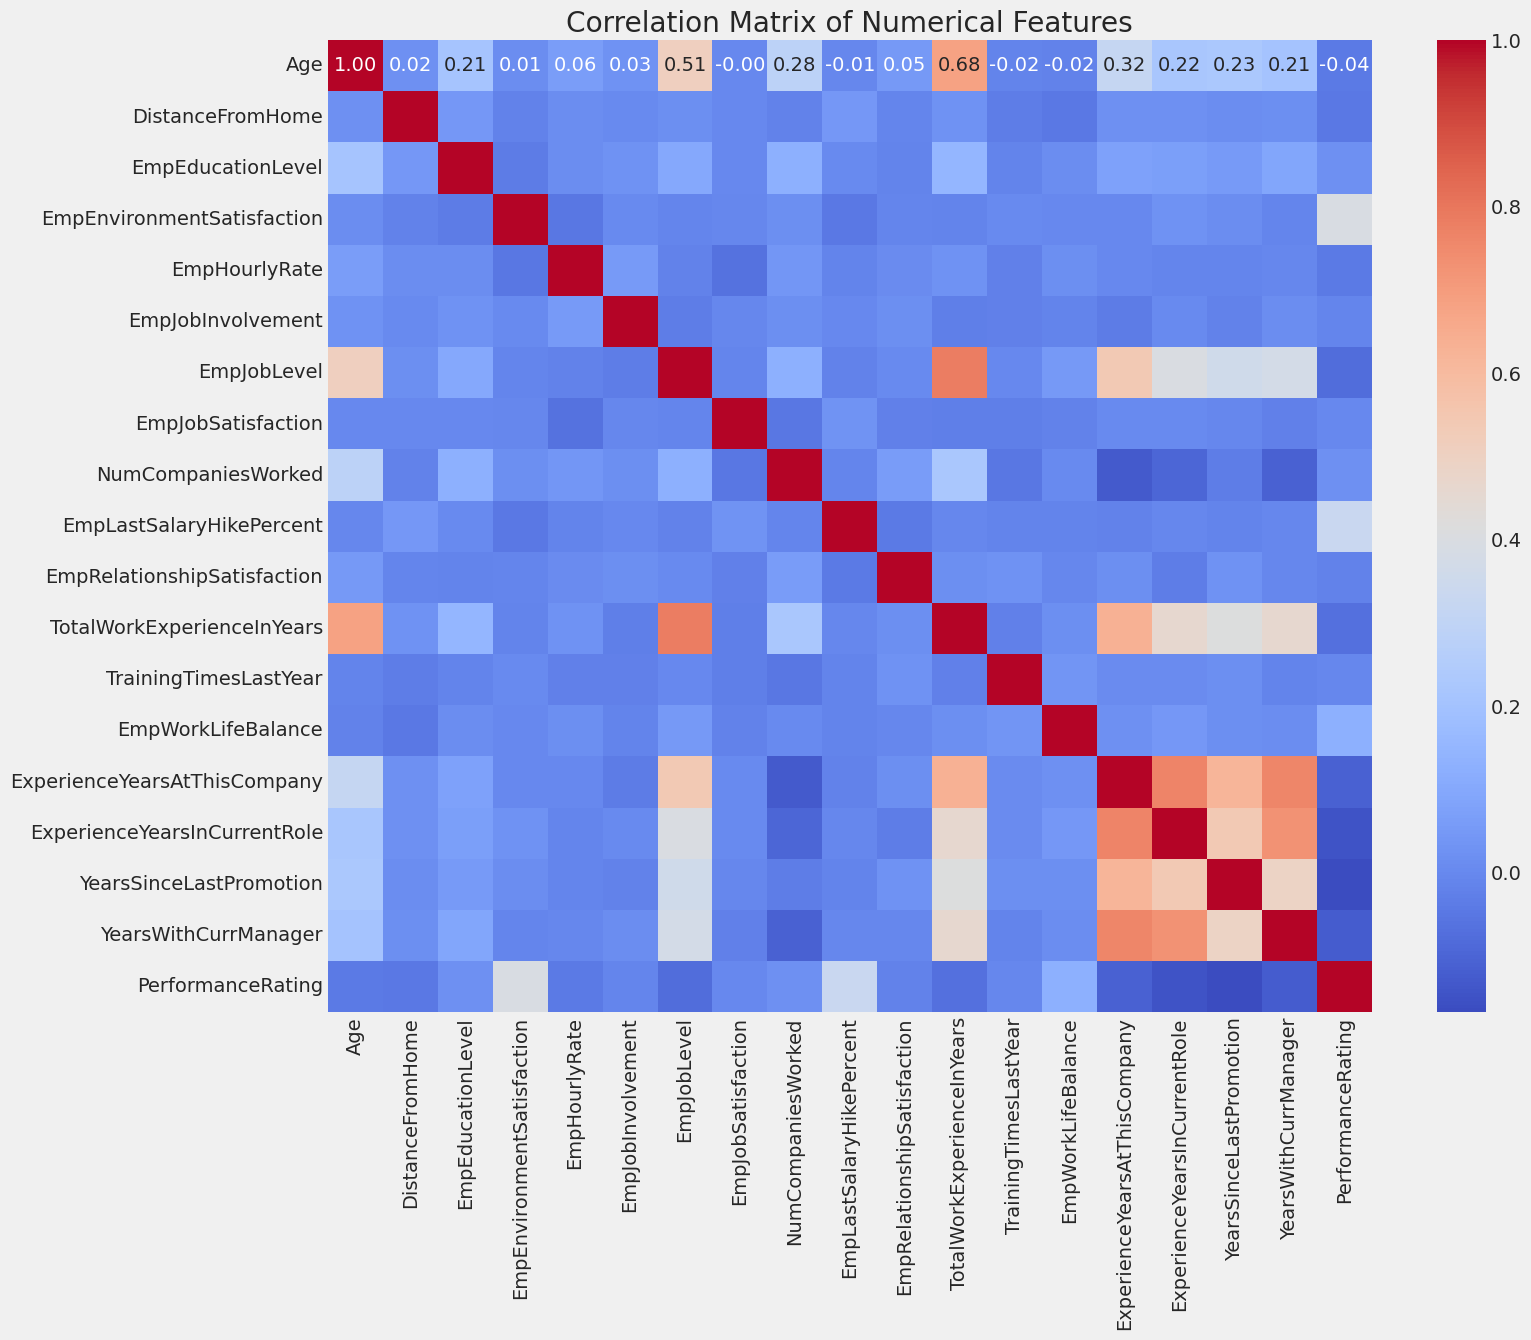

<Figure size 640x480 with 0 Axes>

In [12]:
# Correlation Heatmap
print("Generating a correlation heatmap...")
plt.figure(figsize=(15, 12))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()
plt.savefig('images/correlation_matrix_of_numerical_features.png')


--- Generating AIML-focused Visualizations ---


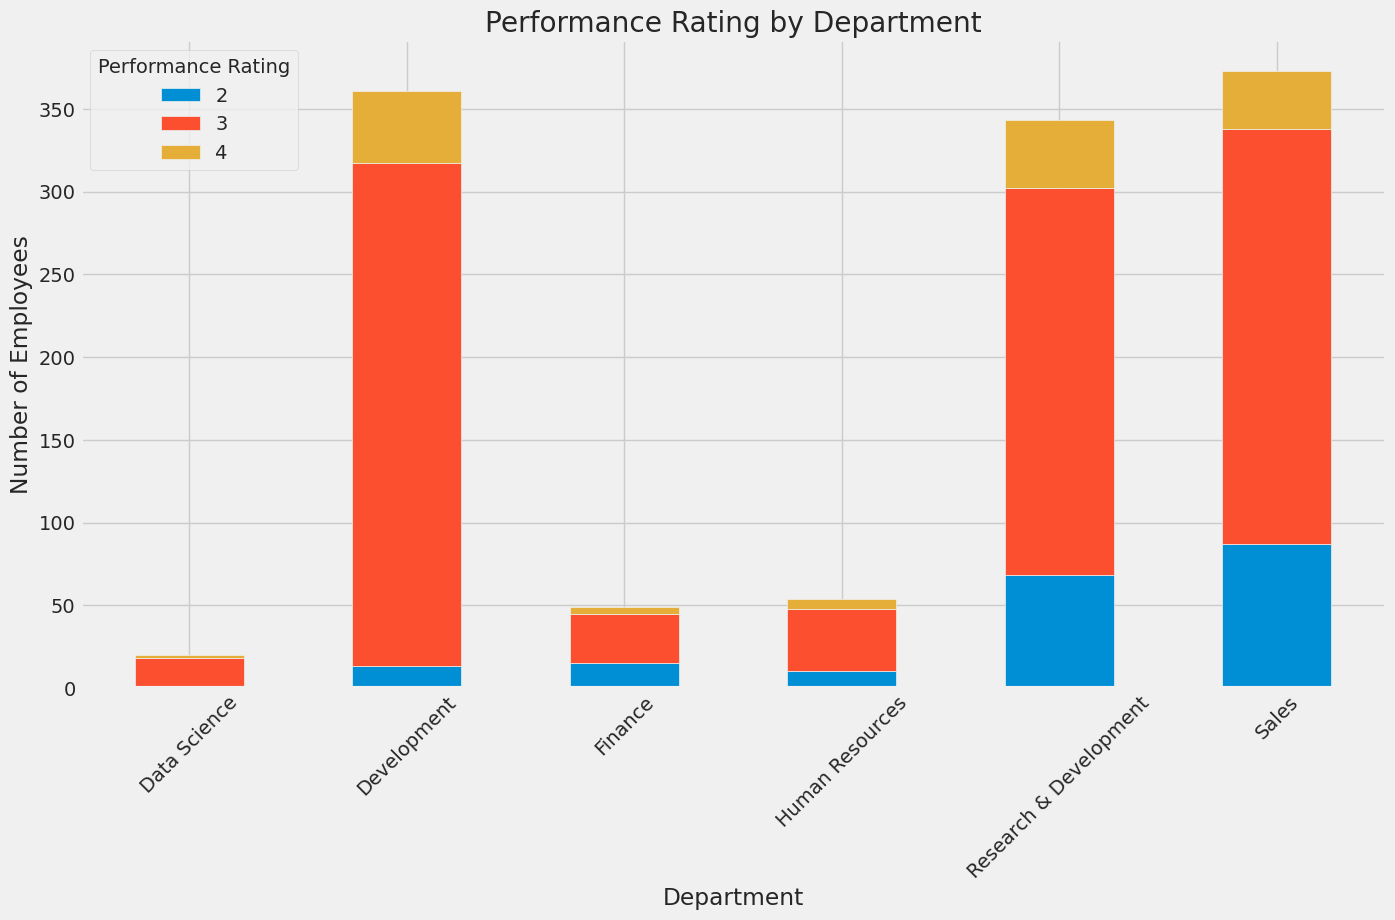

<Figure size 640x480 with 0 Axes>

In [13]:
# --- Step 4: AIML-focused Visualizations ---
print("\n--- Generating AIML-focused Visualizations ---")

# Group the data to get counts of performance ratings per department
df_plot = df.groupby(['EmpDepartment', 'PerformanceRating']).size().unstack(fill_value=0)

# Create the stacked bar chart
df_plot.plot(kind='bar', stacked=True, figsize=(15, 8))

# Add plot labels and a title
plt.title('Performance Rating by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45)
plt.legend(title='Performance Rating')
plt.show()
plt.savefig('images/performance_rating_by_department.png')

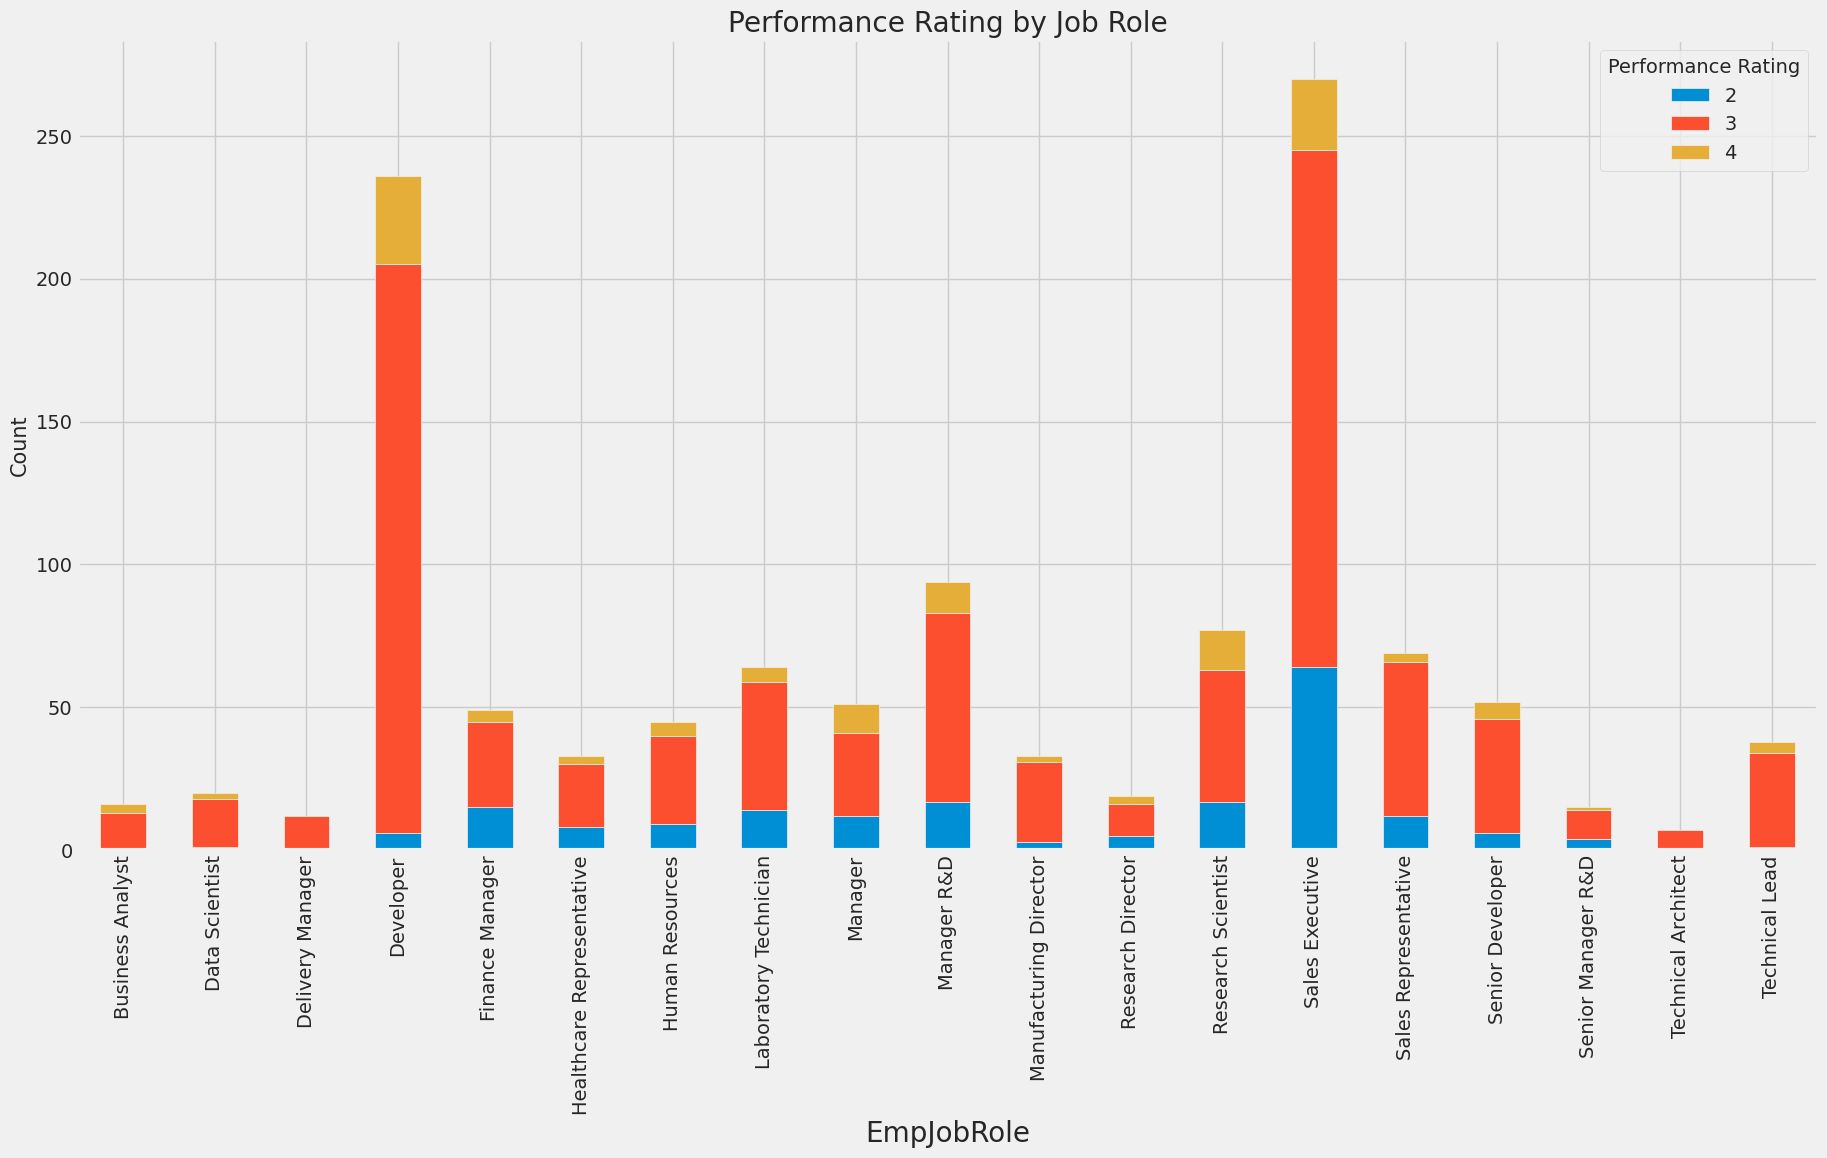

<Figure size 640x480 with 0 Axes>

In [14]:
# Relationship between Job Role and performance rating
# Group the data to get counts of performance ratings per job role
df_plot = df.groupby(['EmpJobRole', 'PerformanceRating']).size().unstack(fill_value=0)

# Create the stacked bar chart
df_plot.plot(kind='bar', stacked=True, figsize=(20, 10))

# Add plot labels and a title
plt.title('Performance Rating by Job Role')
plt.xlabel('EmpJobRole', fontsize=20)
plt.ylabel('Count', fontsize=15)
plt.xticks(rotation='vertical')
plt.legend(title='Performance Rating')
plt.show()
plt.savefig('images/performance_rating_by_job_role.png')

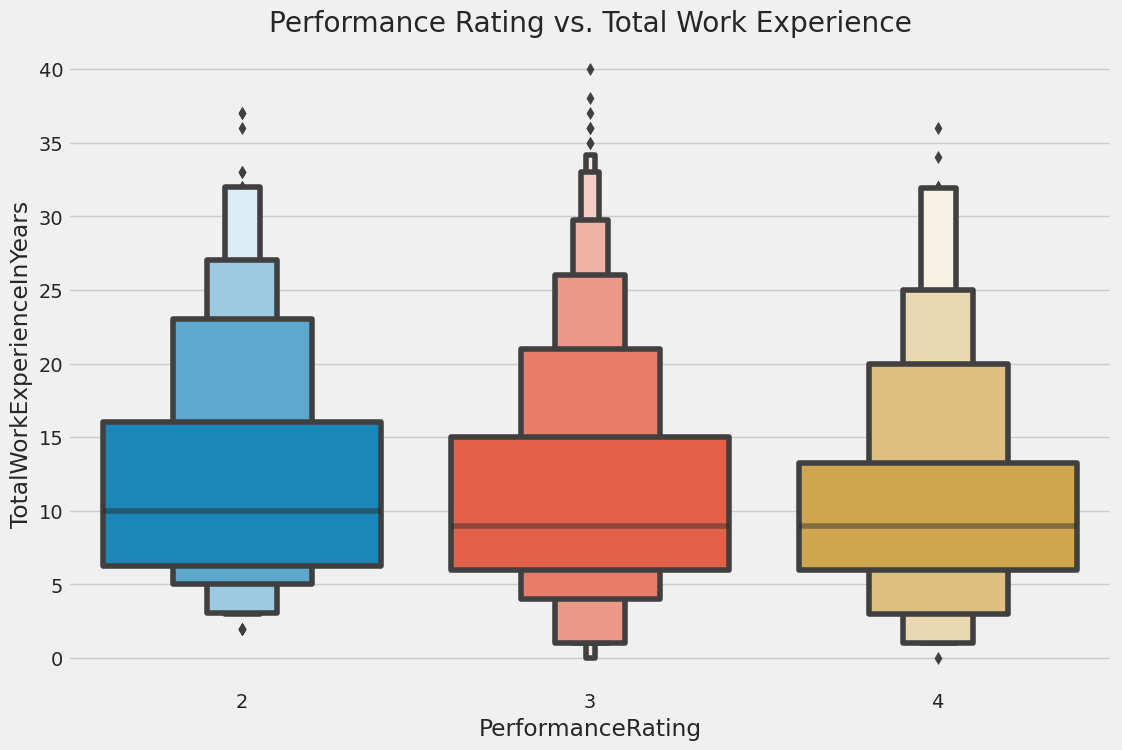

<Figure size 640x480 with 0 Axes>

In [15]:
# Relationship between TotalWorkExperienceInYears and Performance Rating
plt.figure(figsize=(12, 8))
sns.boxenplot(x='PerformanceRating', y='TotalWorkExperienceInYears', data=df)
plt.title('Performance Rating vs. Total Work Experience')
plt.show()
plt.savefig('images/performance_rating_vs_total_work_experience.png')

In [16]:
# --- Step 5: Data Pre-processing for AIML ---
print("\n--- Data Pre-processing for Machine Learning ---")

# Create a copy of the dataframe
df_ml = df.copy()


--- Data Pre-processing for Machine Learning ---


In [17]:
# Drop 'EmpNumber' as it's an identifier
df_ml = df_ml.drop('EmpNumber', axis=1)

In [18]:
# Encode categorical variables using LabelEncoder
print("Encoding categorical variables...")
label_encoders = {}
for col in df_ml.select_dtypes(include='object').columns:
    label_encoders[col] = LabelEncoder()
    df_ml[col] = label_encoders[col].fit_transform(df_ml[col])
print("Categorical variables encoded successfully.")

Encoding categorical variables...
Categorical variables encoded successfully.


In [19]:
# Define features (X) and target (y)
X = df_ml.drop('PerformanceRating', axis=1)
y = df_ml['PerformanceRating']

In [20]:
# Split the data into training and testing sets
print("Splitting data into training and testing sets (80/20)...")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("\nData split into training (80%) and testing (20%) sets.")

Splitting data into training and testing sets (80/20)...

Data split into training (80%) and testing (20%) sets.


In [21]:
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print("\nData pre-processing complete. The data is now ready for model training.")


Shape of X_train: (960, 26)
Shape of X_test: (240, 26)
Shape of y_train: (960,)
Shape of y_test: (240,)

Data pre-processing complete. The data is now ready for model training.


In [22]:
# --- Step 6: Build and Train the Base Model ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("\nRandom Forest Classifier model trained successfully.")


Random Forest Classifier model trained successfully.


In [23]:
# --- Step 7: Model Evaluation and Performance Metrics ---
y_pred = model.predict(X_test)

print("\n--- Model Performance Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


--- Model Performance Metrics ---
Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

           2       0.94      0.85      0.89        39
           3       0.93      0.99      0.96       175
           4       1.00      0.73      0.84        26

    accuracy                           0.94       240
   macro avg       0.96      0.86      0.90       240
weighted avg       0.94      0.94      0.94       240



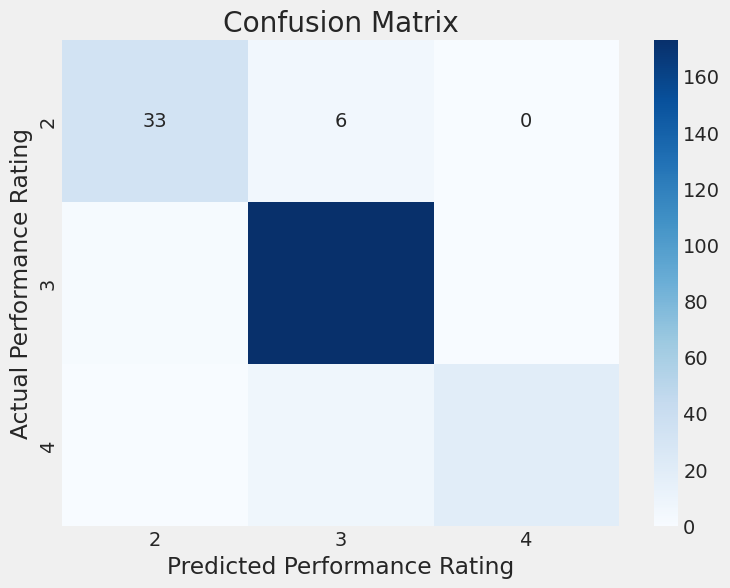

<Figure size 640x480 with 0 Axes>

In [24]:
# Confusion Matrix to visualize model performance
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(y.unique()), yticklabels=sorted(y.unique()))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Performance Rating')
plt.ylabel('Actual Performance Rating')
plt.show()
plt.savefig('images/confusion_matrix.png')

In [25]:
# --- Step 8: Feature Importance for Business Decisions ---
print("\n--- Feature Importances for Business Decisions ---")
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
sorted_features = feature_importances.sort_values(ascending=False)


--- Feature Importances for Business Decisions ---


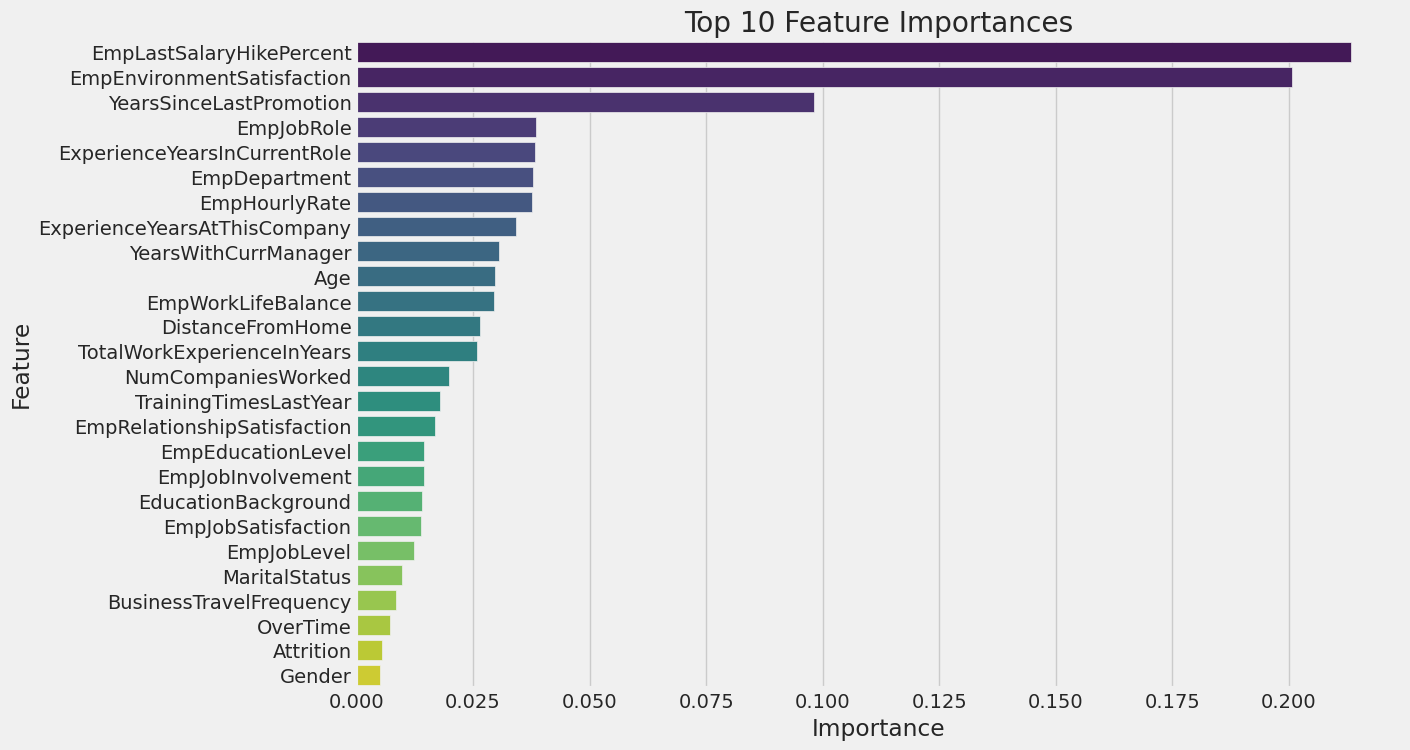

<Figure size 640x480 with 0 Axes>

In [26]:
# Plotting feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=sorted_features.values, y=sorted_features.index, palette='viridis')
plt.title('Top 10 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
plt.savefig('images/feature_importance.png')

In [27]:
# Print the top 10 most important features
print("\nTop 10 most important features influencing Performance Rating:")
print(sorted_features.head(10))


Top 10 most important features influencing Performance Rating:
EmpLastSalaryHikePercent        0.213224
EmpEnvironmentSatisfaction      0.200588
YearsSinceLastPromotion         0.098092
EmpJobRole                      0.038445
ExperienceYearsInCurrentRole    0.038196
EmpDepartment                   0.037965
EmpHourlyRate                   0.037677
ExperienceYearsAtThisCompany    0.034150
YearsWithCurrManager            0.030535
Age                             0.029638
dtype: float64
